In [1]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

In [149]:
bin_edges = np.logspace(-1, 1.5, 30)
wp_val = np.array([511.89106934, 434.72817298, 367.51894291, 308.67955506,
                 262.06550079, 219.80469089, 189.10807373, 157.06729493,
                 133.03354998, 110.33107255,  91.37861791,  75.24295535,
                 62.47973979,  51.81536983,  43.34959669,  36.78829184,
                 31.09688116,  27.38605035,  24.01378719,  20.50715942,
                 17.4525706,  15.14347826,  12.84286794,  10.42136422,
                 8.21821222,   6.58673785,   5.19058215,   3.83202901,
                 2.34105807])
cov = np.array([[ 2.36509552e+02,  9.15311010e+01,  7.39879697e+01,
                     6.09036664e+01,  6.45692619e+01,  5.77193360e+01,
                     4.76073033e+01,  4.14972339e+01,  3.76498613e+01,
                     2.87316142e+01,  2.42788769e+01,  1.99910604e+01,
                     1.69723076e+01,  1.27658843e+01,  1.09820866e+01,
                     8.74561048e+00,  6.78031754e+00,  5.64404402e+00,
                     5.01791716e+00,  3.77255142e+00,  3.59052876e+00,
                     3.14019720e+00,  2.03073429e+00,  4.37965616e-01,
                    -4.19339441e-01, -8.69545658e-01, -1.75918088e+00,
                    -3.15199579e+00, -3.56879870e+00],
                   [ 9.15311010e+01,  1.81453427e+02,  7.43884516e+01,
                     7.21738555e+01,  7.72582229e+01,  6.59355658e+01,
                     6.14602406e+01,  5.43960566e+01,  4.83252076e+01,
                     4.34216848e+01,  3.46007219e+01,  3.08990166e+01,
                     2.66063771e+01,  2.25632065e+01,  2.02224672e+01,
                     1.68078939e+01,  1.41901571e+01,  1.25632884e+01,
                     1.14270957e+01,  1.00904184e+01,  9.30202805e+00,
                     8.58964901e+00,  6.44221829e+00,  4.57397822e+00,
                     2.92805447e+00,  2.12689342e+00,  4.22759539e-01,
                    -1.08648515e+00, -2.27808131e+00],
                   [ 7.39879697e+01,  7.43884516e+01,  1.08728721e+02,
                     6.28712011e+01,  6.43370915e+01,  5.44048240e+01,
                     5.05120267e+01,  4.58190100e+01,  4.11574831e+01,
                     3.86703966e+01,  3.13563090e+01,  2.60238068e+01,
                     2.22797020e+01,  1.78133808e+01,  1.56315112e+01,
                     1.28399556e+01,  1.09197345e+01,  9.29114039e+00,
                     8.34227186e+00,  7.24857865e+00,  6.77477554e+00,
                     5.91446532e+00,  4.73934839e+00,  3.52602988e+00,
                     2.21654244e+00,  9.28929842e-01, -1.07427890e-01,
                    -1.03906086e+00, -1.34387366e+00],
                   [ 6.09036664e+01,  7.21738555e+01,  6.28712011e+01,
                     8.82088787e+01,  6.12458196e+01,  5.14208445e+01,
                     4.71012432e+01,  4.42888924e+01,  3.71898625e+01,
                     3.38544515e+01,  2.88971870e+01,  2.31233281e+01,
                     2.04562552e+01,  1.69282994e+01,  1.52786999e+01,
                     1.28594240e+01,  1.12482994e+01,  9.31423481e+00,
                     8.56539270e+00,  7.47996912e+00,  7.37409491e+00,
                     6.58679515e+00,  5.93434033e+00,  4.99313711e+00,
                     3.83174642e+00,  3.05506685e+00,  2.25309330e+00,
                     1.23565689e+00,  2.79344609e-01],
                   [ 6.45692619e+01,  7.72582229e+01,  6.43370915e+01,
                     6.12458196e+01,  8.65288687e+01,  5.71240326e+01,
                     5.27829794e+01,  4.89025349e+01,  4.34374109e+01,
                     4.07355525e+01,  3.31441152e+01,  2.77970329e+01,
                     2.45338865e+01,  2.00748205e+01,  1.72015024e+01,
                     1.37634353e+01,  1.20401909e+01,  1.02864602e+01,
                     9.71667548e+00,  8.76755478e+00,  8.27000809e+00,
                     7.70153384e+00,  6.68589504e+00,  5.41426183e+00,
                     4.10431131e+00,  3.13474248e+00,  1.65571845e+00,
                     2.91948314e-01, -8.16055506e-01],
                   [ 5.77193360e+01,  6.59355658e+01,  5.44048240e+01,
                     5.14208445e+01,  5.71240326e+01,  6.57020570e+01,
                     4.99041365e+01,  4.44227046e+01,  4.10835437e+01,
                     3.74313113e+01,  3.18873494e+01,  2.68349452e+01,
                     2.36124600e+01,  1.98401509e+01,  1.72212048e+01,
                     1.41117588e+01,  1.23184460e+01,  1.04499356e+01,
                     9.91205648e+00,  8.93482283e+00,  8.41850476e+00,
                     7.48516808e+00,  6.54551705e+00,  5.77197492e+00,
                     4.89174655e+00,  4.22788601e+00,  3.14688711e+00,
                     1.74139428e+00,  2.51356140e-01],
                   [ 4.76073033e+01,  6.14602406e+01,  5.05120267e+01,
                     4.71012432e+01,  5.27829794e+01,  4.99041365e+01,
                     5.33478067e+01,  4.27167264e+01,  3.91350894e+01,
                     3.65477591e+01,  3.11514221e+01,  2.63872128e+01,
                     2.26324343e+01,  1.89959653e+01,  1.62516735e+01,
                     1.31929876e+01,  1.11738004e+01,  9.35077093e+00,
                     8.83577966e+00,  7.98043954e+00,  7.49866376e+00,
                     6.88540304e+00,  6.01131854e+00,  5.41783001e+00,
                     4.65987907e+00,  3.88347041e+00,  2.76341557e+00,
                     1.55358798e+00,  5.03253824e-01],
                   [ 4.14972339e+01,  5.43960566e+01,  4.58190100e+01,
                     4.42888924e+01,  4.89025349e+01,  4.44227046e+01,
                     4.27167264e+01,  4.50170457e+01,  3.78547619e+01,
                     3.49634698e+01,  2.96527541e+01,  2.49023234e+01,
                     2.11818221e+01,  1.76648950e+01,  1.51777964e+01,
                     1.24003881e+01,  1.06921978e+01,  9.23040594e+00,
                     8.64555338e+00,  7.79691706e+00,  7.42359185e+00,
                     6.83449050e+00,  5.96299953e+00,  5.38713801e+00,
                     4.74514153e+00,  3.93791452e+00,  2.99571861e+00,
                     1.79871397e+00,  5.08217249e-01],
                   [ 3.76498613e+01,  4.83252076e+01,  4.11574831e+01,
                     3.71898625e+01,  4.34374109e+01,  4.10835437e+01,
                     3.91350894e+01,  3.78547619e+01,  3.79438755e+01,
                     3.31431038e+01,  2.82245472e+01,  2.40686429e+01,
                     2.07106451e+01,  1.75017778e+01,  1.48849715e+01,
                     1.21853678e+01,  1.04030645e+01,  8.60797608e+00,
                     8.16844292e+00,  7.23552663e+00,  6.86447648e+00,
                     6.37212072e+00,  5.61344165e+00,  5.17144399e+00,
                     4.50675886e+00,  3.62384734e+00,  2.56543340e+00,
                     1.54309417e+00,  3.29184438e-01],
                   [ 2.87316142e+01,  4.34216848e+01,  3.86703966e+01,
                     3.38544515e+01,  4.07355525e+01,  3.74313113e+01,
                     3.65477591e+01,  3.49634698e+01,  3.31431038e+01,
                     3.35052475e+01,  2.72856226e+01,  2.31950596e+01,
                     1.98992030e+01,  1.70207023e+01,  1.43459487e+01,
                     1.17744499e+01,  1.00913251e+01,  8.35064934e+00,
                     7.95844601e+00,  7.09958214e+00,  6.62248825e+00,
                     6.12860320e+00,  5.26371554e+00,  4.87838581e+00,
                     4.25621359e+00,  3.35568122e+00,  2.23547543e+00,
                     1.22749389e+00,  1.34667684e-01],
                   [ 2.42788769e+01,  3.46007219e+01,  3.13563090e+01,
                     2.88971870e+01,  3.31441152e+01,  3.18873494e+01,
                     3.11514221e+01,  2.96527541e+01,  2.82245472e+01,
                     2.72856226e+01,  2.50664160e+01,  2.06234035e+01,
                     1.78230533e+01,  1.52784138e+01,  1.29221376e+01,
                     1.05344863e+01,  8.99488185e+00,  7.40147015e+00,
                     7.01119861e+00,  6.29899352e+00,  5.91987499e+00,
                     5.38473443e+00,  4.74405181e+00,  4.31444693e+00,
                     3.78306945e+00,  3.03355143e+00,  2.11342720e+00,
                     1.26256936e+00,  3.97669949e-01],
                   [ 1.99910604e+01,  3.08990166e+01,  2.60238068e+01,
                     2.31233281e+01,  2.77970329e+01,  2.68349452e+01,
                     2.63872128e+01,  2.49023234e+01,  2.40686429e+01,
                     2.31950596e+01,  2.06234035e+01,  1.86884309e+01,
                     1.58680417e+01,  1.36193557e+01,  1.15020385e+01,
                     9.44820165e+00,  8.09995393e+00,  6.68438563e+00,
                     6.25839857e+00,  5.58662383e+00,  5.20116812e+00,
                     4.69523522e+00,  4.10863232e+00,  3.73152863e+00,
                     3.25970538e+00,  2.63052086e+00,  1.84661429e+00,
                     1.13062641e+00,  4.19781524e-01],
                   [ 1.69723076e+01,  2.66063771e+01,  2.22797020e+01,
                     2.04562552e+01,  2.45338865e+01,  2.36124600e+01,
                     2.26324343e+01,  2.11818221e+01,  2.07106451e+01,
                     1.98992030e+01,  1.78230533e+01,  1.58680417e+01,
                     1.45974730e+01,  1.24445189e+01,  1.05605250e+01,
                     8.69659223e+00,  7.55216021e+00,  6.25267488e+00,
                     5.87571212e+00,  5.24209999e+00,  4.80682956e+00,
                     4.32744472e+00,  3.75998283e+00,  3.36701120e+00,
                     2.84130896e+00,  2.27221077e+00,  1.52390212e+00,
                     8.58301794e-01,  1.70968431e-01],
                   [ 1.27658843e+01,  2.25632065e+01,  1.78133808e+01,
                     1.69282994e+01,  2.00748205e+01,  1.98401509e+01,
                     1.89959653e+01,  1.76648950e+01,  1.75017778e+01,
                     1.70207023e+01,  1.52784138e+01,  1.36193557e+01,
                     1.24445189e+01,  1.14666921e+01,  9.65373098e+00,
                     7.95949626e+00,  6.94679024e+00,  5.73763930e+00,
                     5.40121410e+00,  4.81715578e+00,  4.38335897e+00,
                     3.90599355e+00,  3.42605390e+00,  3.10283028e+00,
                     2.66364942e+00,  2.14586175e+00,  1.45369331e+00,
                     8.92407639e-01,  2.40612750e-01],
                   [ 1.09820866e+01,  2.02224672e+01,  1.56315112e+01,
                     1.52786999e+01,  1.72015024e+01,  1.72212048e+01,
                     1.62516735e+01,  1.51777964e+01,  1.48849715e+01,
                     1.43459487e+01,  1.29221376e+01,  1.15020385e+01,
                     1.05605250e+01,  9.65373098e+00,  8.79314865e+00,
                     7.28713914e+00,  6.42905152e+00,  5.35161167e+00,
                     4.98710438e+00,  4.44818080e+00,  4.04199556e+00,
                     3.61746555e+00,  3.23384895e+00,  2.98052654e+00,
                     2.57779562e+00,  2.13378362e+00,  1.54221087e+00,
                     1.07176197e+00,  4.47443368e-01],
                   [ 8.74561048e+00,  1.68078939e+01,  1.28399556e+01,
                     1.28594240e+01,  1.37634353e+01,  1.41117588e+01,
                     1.31929876e+01,  1.24003881e+01,  1.21853678e+01,
                     1.17744499e+01,  1.05344863e+01,  9.44820165e+00,
                     8.69659223e+00,  7.95949626e+00,  7.28713914e+00,
                     6.56298503e+00,  5.78927520e+00,  4.87222232e+00,
                     4.53605328e+00,  4.06800005e+00,  3.71986546e+00,
                     3.35160560e+00,  3.03230090e+00,  2.87226103e+00,
                     2.56789894e+00,  2.22180868e+00,  1.70829348e+00,
                     1.27859725e+00,  6.34967423e-01],
                   [ 6.78031754e+00,  1.41901571e+01,  1.09197345e+01,
                     1.12482994e+01,  1.20401909e+01,  1.23184460e+01,
                     1.11738004e+01,  1.06921978e+01,  1.04030645e+01,
                     1.00913251e+01,  8.99488185e+00,  8.09995393e+00,
                     7.55216021e+00,  6.94679024e+00,  6.42905152e+00,
                     5.78927520e+00,  5.54073672e+00,  4.68357057e+00,
                     4.38081417e+00,  3.95300882e+00,  3.64621097e+00,
                     3.31059392e+00,  3.05186634e+00,  2.90491925e+00,
                     2.61177093e+00,  2.29447782e+00,  1.84982387e+00,
                     1.44443719e+00,  7.59893604e-01],
                   [ 5.64404402e+00,  1.25632884e+01,  9.29114039e+00,
                     9.31423481e+00,  1.02864602e+01,  1.04499356e+01,
                     9.35077093e+00,  9.23040594e+00,  8.60797608e+00,
                     8.35064934e+00,  7.40147015e+00,  6.68438563e+00,
                     6.25267488e+00,  5.73763930e+00,  5.35161167e+00,
                     4.87222232e+00,  4.68357057e+00,  4.40784850e+00,
                     4.17232922e+00,  3.82802898e+00,  3.58358290e+00,
                     3.34369227e+00,  3.13015990e+00,  3.00258643e+00,
                     2.72653584e+00,  2.46994016e+00,  2.06043806e+00,
                     1.67381293e+00,  9.83776744e-01],
                   [ 5.01791716e+00,  1.14270957e+01,  8.34227186e+00,
                     8.56539270e+00,  9.71667548e+00,  9.91205648e+00,
                     8.83577966e+00,  8.64555338e+00,  8.16844292e+00,
                     7.95844601e+00,  7.01119861e+00,  6.25839857e+00,
                     5.87571212e+00,  5.40121410e+00,  4.98710438e+00,
                     4.53605328e+00,  4.38081417e+00,  4.17232922e+00,
                     4.31270695e+00,  3.99620216e+00,  3.78986836e+00,
                     3.57439539e+00,  3.39475506e+00,  3.27919234e+00,
                     3.05358431e+00,  2.84291046e+00,  2.45345941e+00,
                     2.08582251e+00,  1.37576149e+00],
                   [ 3.77255142e+00,  1.00904184e+01,  7.24857865e+00,
                     7.47996912e+00,  8.76755478e+00,  8.93482283e+00,
                     7.98043954e+00,  7.79691706e+00,  7.23552663e+00,
                     7.09958214e+00,  6.29899352e+00,  5.58662383e+00,
                     5.24209999e+00,  4.81715578e+00,  4.44818080e+00,
                     4.06800005e+00,  3.95300882e+00,  3.82802898e+00,
                     3.99620216e+00,  4.00758325e+00,  3.86348564e+00,
                     3.68282621e+00,  3.52560719e+00,  3.42604030e+00,
                     3.25556980e+00,  3.06931915e+00,  2.65930985e+00,
                     2.29355874e+00,  1.55288996e+00],
                   [ 3.59052876e+00,  9.30202805e+00,  6.77477554e+00,
                     7.37409491e+00,  8.27000809e+00,  8.41850476e+00,
                     7.49866376e+00,  7.42359185e+00,  6.86447648e+00,
                     6.62248825e+00,  5.91987499e+00,  5.20116812e+00,
                     4.80682956e+00,  4.38335897e+00,  4.04199556e+00,
                     3.71986546e+00,  3.64621097e+00,  3.58358290e+00,
                     3.78986836e+00,  3.86348564e+00,  3.99708317e+00,
                     3.90278527e+00,  3.80074934e+00,  3.71787066e+00,
                     3.58642938e+00,  3.44275468e+00,  3.03681549e+00,
                     2.67990570e+00,  1.88033657e+00],
                   [ 3.14019720e+00,  8.58964901e+00,  5.91446532e+00,
                     6.58679515e+00,  7.70153384e+00,  7.48516808e+00,
                     6.88540304e+00,  6.83449050e+00,  6.37212072e+00,
                     6.12860320e+00,  5.38473443e+00,  4.69523522e+00,
                     4.32744472e+00,  3.90599355e+00,  3.61746555e+00,
                     3.35160560e+00,  3.31059392e+00,  3.34369227e+00,
                     3.57439539e+00,  3.68282621e+00,  3.90278527e+00,
                     4.08900782e+00,  4.05992933e+00,  4.02925740e+00,
                     3.96215374e+00,  3.86777522e+00,  3.50896171e+00,
                     3.18473276e+00,  2.33929965e+00],
                   [ 2.03073429e+00,  6.44221829e+00,  4.73934839e+00,
                     5.93434033e+00,  6.68589504e+00,  6.54551705e+00,
                     6.01131854e+00,  5.96299953e+00,  5.61344165e+00,
                     5.26371554e+00,  4.74405181e+00,  4.10863232e+00,
                     3.75998283e+00,  3.42605390e+00,  3.23384895e+00,
                     3.03230090e+00,  3.05186634e+00,  3.13015990e+00,
                     3.39475506e+00,  3.52560719e+00,  3.80074934e+00,
                     4.05992933e+00,  4.30630681e+00,  4.37606432e+00,
                     4.38177837e+00,  4.35701600e+00,  4.06678831e+00,
                     3.80146542e+00,  2.93594021e+00],
                   [ 4.37965616e-01,  4.57397822e+00,  3.52602988e+00,
                     4.99313711e+00,  5.41426183e+00,  5.77197492e+00,
                     5.41783001e+00,  5.38713801e+00,  5.17144399e+00,
                     4.87838581e+00,  4.31444693e+00,  3.73152863e+00,
                     3.36701120e+00,  3.10283028e+00,  2.98052654e+00,
                     2.87226103e+00,  2.90491925e+00,  3.00258643e+00,
                     3.27919234e+00,  3.42604030e+00,  3.71787066e+00,
                     4.02925740e+00,  4.37606432e+00,  4.79370415e+00,
                     4.91807679e+00,  4.98026900e+00,  4.75125610e+00,
                     4.47497486e+00,  3.46849456e+00],
                   [-4.19339441e-01,  2.92805447e+00,  2.21654244e+00,
                     3.83174642e+00,  4.10431131e+00,  4.89174655e+00,
                     4.65987907e+00,  4.74514153e+00,  4.50675886e+00,
                     4.25621359e+00,  3.78306945e+00,  3.25970538e+00,
                     2.84130896e+00,  2.66364942e+00,  2.57779562e+00,
                     2.56789894e+00,  2.61177093e+00,  2.72653584e+00,
                     3.05358431e+00,  3.25556980e+00,  3.58642938e+00,
                     3.96215374e+00,  4.38177837e+00,  4.91807679e+00,
                     5.40683851e+00,  5.65985098e+00,  5.54508775e+00,
                     5.32716245e+00,  4.26576964e+00],
                   [-8.69545658e-01,  2.12689342e+00,  9.28929842e-01,
                     3.05506685e+00,  3.13474248e+00,  4.22788601e+00,
                     3.88347041e+00,  3.93791452e+00,  3.62384734e+00,
                     3.35568122e+00,  3.03355143e+00,  2.63052086e+00,
                     2.27221077e+00,  2.14586175e+00,  2.13378362e+00,
                     2.22180868e+00,  2.29447782e+00,  2.46994016e+00,
                     2.84291046e+00,  3.06931915e+00,  3.44275468e+00,
                     3.86777522e+00,  4.35701600e+00,  4.98026900e+00,
                     5.65985098e+00,  6.30532751e+00,  6.41826497e+00,
                     6.29798603e+00,  5.18755609e+00],
                   [-1.75918088e+00,  4.22759539e-01, -1.07427890e-01,
                     2.25309330e+00,  1.65571845e+00,  3.14688711e+00,
                     2.76341557e+00,  2.99571861e+00,  2.56543340e+00,
                     2.23547543e+00,  2.11342720e+00,  1.84661429e+00,
                     1.52390212e+00,  1.45369331e+00,  1.54221087e+00,
                     1.70829348e+00,  1.84982387e+00,  2.06043806e+00,
                     2.45345941e+00,  2.65930985e+00,  3.03681549e+00,
                     3.50896171e+00,  4.06678831e+00,  4.75125610e+00,
                     5.54508775e+00,  6.41826497e+00,  6.97568203e+00,
                     7.11804060e+00,  6.10833984e+00],
                   [-3.15199579e+00, -1.08648515e+00, -1.03906086e+00,
                     1.23565689e+00,  2.91948314e-01,  1.74139428e+00,
                     1.55358798e+00,  1.79871397e+00,  1.54309417e+00,
                     1.22749389e+00,  1.26256936e+00,  1.13062641e+00,
                     8.58301794e-01,  8.92407639e-01,  1.07176197e+00,
                     1.27859725e+00,  1.44443719e+00,  1.67381293e+00,
                     2.08582251e+00,  2.29355874e+00,  2.67990570e+00,
                     3.18473276e+00,  3.80146542e+00,  4.47497486e+00,
                     5.32716245e+00,  6.29798603e+00,  7.11804060e+00,
                     7.75666109e+00,  7.04389976e+00],
                   [-3.56879870e+00, -2.27808131e+00, -1.34387366e+00,
                     2.79344609e-01, -8.16055506e-01,  2.51356140e-01,
                     5.03253824e-01,  5.08217249e-01,  3.29184438e-01,
                     1.34667684e-01,  3.97669949e-01,  4.19781524e-01,
                     1.70968431e-01,  2.40612750e-01,  4.47443368e-01,
                     6.34967423e-01,  7.59893604e-01,  9.83776744e-01,
                     1.37576149e+00,  1.55288996e+00,  1.88033657e+00,
                     2.33929965e+00,  2.93594021e+00,  3.46849456e+00,
                     4.26576964e+00,  5.18755609e+00,  6.10833984e+00,
                     7.04389976e+00,  7.09565921e+00]])

In [93]:
err = np.sqrt(np.array([cov[i,i] for i in range(len(cov))]))
bin_cen = (bin_edges[1:]+bin_edges[:-1])/2.

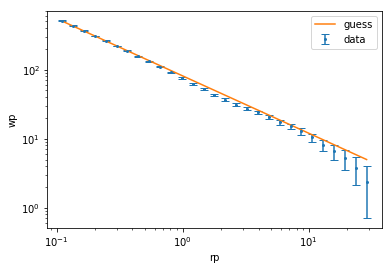

In [80]:
plt.errorbar(bin_cen,wp_val,yerr=np.sqrt(err),fmt='o',markersize=2,capsize=4,label='data')
plt.plot(bin_cen,(bin_cen/200)**-0.83,label = 'guess')
plt.legend()
plt.ylabel('wp')
plt.xlabel('rp')
plt.xscale('log')
plt.yscale('log')

In [81]:
#log liklihood
def lnlike(theta, rp, wp_val, wperr):
    ro, g = theta
    model = (rp/ro)**(-g)
    inv_sigma2 = 1.0/wperr**2.
    return -0.5*(np.sum((wp_val-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [82]:
#log prior
def lnprior(theta):
    ro, g = theta
    if 50. < ro < 450. and -1.0 < g < 2.0:
        return 0.0
    return -np.inf

In [83]:
#log prop
def lnprob(theta, rp, wp_val, wperr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, rp, wp_val, wperr)

In [84]:
ndim, nwalkers = 2, 100
guess = [200.,0.8]
pos = [guess + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [85]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(bin_cen, wp_val, err))

In [ ]:
sampler.run_mcmc(pos, 2000)

In [88]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
print(sampler.chain[np.where(sampler.lnprobability==sampler.lnprobability.max())])
#print(sampler.get_autocorr_time(c=10))

[[142.83856515   0.87319197]]


Text(0,0.5,'ro')

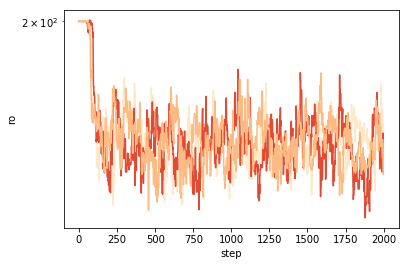

In [89]:
c = ['#fee8c8','#fdbb84','#e34a33']
for i in range(3):
    plt.plot(sampler.chain[i+50,1:2000,0],c= c[-i])
    #plt.ylim(150,250)
plt.yscale('log')
plt.xlabel('step')
plt.ylabel('ro')

Text(0,0.5,'g')

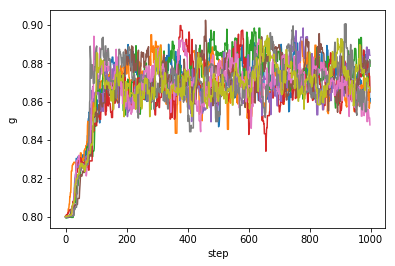

In [90]:
for i in range(1,10):
    plt.plot(sampler.chain[i,1:1000,1])
plt.xlabel('step')
plt.ylabel('g')

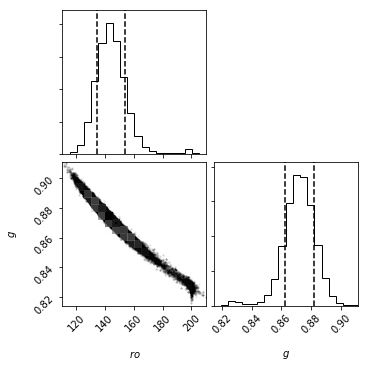

In [91]:
fig = corner.corner(samples, labels=["$ro$", "$g$", "$\ln\,f$"],quantiles=(0.16, 0.84), levels=(1-np.exp(-0.5),))

Text(0,0.5,'wp')

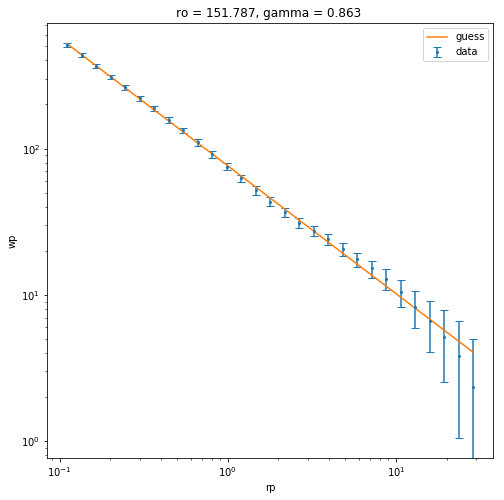

In [94]:
plt.figure(figsize=(8,8))
plt.errorbar(bin_cen,wp_val,yerr=err,fmt='o',markersize=2,capsize=4,label='data')
plt.plot(bin_cen,(bin_cen/142.83856515)**-0.87319197,label="guess")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('ro = 151.787, gamma = 0.863 ')
plt.xlabel('rp')
plt.ylabel('wp')

In [95]:
from halotools.sim_manager import CachedHaloCatalog, FakeSim
from halotools.empirical_models import PrebuiltHodModelFactory, Zheng07Cens, Zheng07Sats, TrivialPhaseSpace, NFWPhaseSpace, HodModelFactory
from halotools.mock_observables import wp,return_xyz_formatted_array

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [158]:
cens_occ_model = Zheng07Cens()
cens_prof_model = TrivialPhaseSpace()

sats_occ_model =  Zheng07Sats()
sats_prof_model = NFWPhaseSpace()

cens_occ_model.param_dict['logMmin'] = 11.96
cens_occ_model.param_dict['sigma_logM'] = 0.38
sats_occ_model.param_dict['alpha'] = 1.16
sats_occ_model.param_dict['logM0'] = 11.3
sats_occ_model.param_dict['logM1'] = 13.28

model_instance = HodModelFactory(centrals_occupation = cens_occ_model, centrals_profile = cens_prof_model, 
                                 satellites_occupation = sats_occ_model, satellites_profile = sats_prof_model)

halocat = CachedHaloCatalog(simname='bolplanck',redshift = 0.0) 
model_instance.populate_mock(halocat) 
table = model_instance.mock.halo_table

pos = return_xyz_formatted_array(model_instance.mock.galaxy_table['x'], model_instance.mock.galaxy_table['y'],
                                 model_instance.mock.galaxy_table['z'])
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]
velz = model_instance.mock.galaxy_table['vz']
pos_zdist = return_xyz_formatted_array(x,y,z, velocity=velz, velocity_distortion_dimension='z')

In [156]:
#log liklihood
def lnlike(theta, wp_val, wperr):
    logMmin, sigma_logM, alpha, logM0, logM1 = theta
    cens_occ_model.param_dict['logMmin'] = logMmin
    cens_occ_model.param_dict['sigma_logM'] = sigma_logM
    sats_occ_model.param_dict['alpha'] = alpha
    sats_occ_model.param_dict['logM0'] = logM0
    sats_occ_model.param_dict['logM1'] = logM1
    model_instance = HodModelFactory(centrals_occupation = cens_occ_model, centrals_profile = cens_prof_model, 
                                 satellites_occupation = sats_occ_model, satellites_profile = sats_prof_model)
    model_instance.mock.populate() 
    table = model_instance.mock.halo_table
    pos = return_xyz_formatted_array(model_instance.mock.galaxy_table['x'], model_instance.mock.galaxy_table['y'],
                                 model_instance.mock.galaxy_table['z'])
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    velz = model_instance.mock.galaxy_table['vz']
    pi_max = 60.
    bin_edges = np.logspace(-1, 1.5, 30)
    Lbox = 250.
    model = wp(pos_zdist, bin_edges, pi_max, period=Lbox)
    inv_sigma2 = 1.0/wperr**2.
    return -0.5*(np.sum((wp_val-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [142]:
#log prior
def lnprior(theta):
    logMmin, sigma_logM, alpha, logM0, logM1 = theta
    if 10.<logMmin<13. and 0.25<sigma_logM<0.5 and 1.0<alpha<1.3 and 11.<logM0<11.5 and 13.<logM1<13.5:
        return 0.0
    return -np.inf

In [143]:
#log prop
def lnprob(theta, wp_val, wperr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, wp_val, wperr)

In [144]:
ndim, nwalkers = 5, 100
guess = [11.96,0.38,1.16,11.3,13.28]
pos = [guess + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [150]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(wp_val, err))

In [ ]:
sampler.run_mcmc(pos, 1)

In [153]:
samples = sampler.chain[:, :, :].reshape((-1, ndim))
print(sampler.chain[np.where(sampler.lnprobability==sampler.lnprobability.max())])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
